In [3]:
import keras as k
import scipy

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping


from keras.models import Sequential
from keras.layers import Dense, Activation
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
home = '/home/nandhini/aozel/periodicBox/alpp0.1/CFD/0.65/'
#home = '/home/nandhini/aozel/periodicBox/alpp0.1dp300mm/CFD/0.65/'
#home = '/home/nandhini/aozel/periodicBox/alpp0.3/CFD/0.425/'


fsize = 9
time = 0.65

In [6]:
alpp_file = 'barAlpp' + str(fsize) + 'X' + str(fsize) + 'X' + str(fsize)
alpp = pd.read_csv(home+alpp_file,skiprows=21,skipfooter=33)
numpy_alpp = alpp.values

Us_file = 'tildeUs' + str(fsize) + 'X' + str(fsize) + 'X' + str(fsize)
Us = pd.read_csv(home+Us_file,skiprows=21,skipfooter=33)
Us = Us.values
numpy_Us = np.array([[float(x[0].split()[0][1:]), float(x[0].split()[1]), float(x[0].split()[2][:-1])] for x in Us])

Uf_file = 'tildeUf' + str(fsize) + 'X' + str(fsize) + 'X' + str(fsize)
Uf = pd.read_csv(home+Uf_file,skiprows=21,skipfooter=33)
Uf = Uf.values
numpy_Uf = np.array([[float(x[0].split()[0][1:]), float(x[0].split()[1]), float(x[0].split()[2][:-1])] for x in Uf])

/home/hema/yile/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
/home/hema/yile/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/hema/yile/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [7]:
numpy_Uslip = numpy_Uf - numpy_Us

In [8]:
numpy_alpp.shape, numpy_Us.shape, numpy_Uf.shape, numpy_Uslip.shape

((2048000, 1), (2048000, 3), (2048000, 3), (2048000, 3))

In [9]:
betaNum_file = 'normalizedEulerianDragCoeffNum' + str(fsize) + 'X' + str(fsize) + 'X' + str(fsize)
betaNum = pd.read_csv(home+betaNum_file,skiprows=19,skipfooter=4)
betaNum = betaNum.values
numpy_betaNum = np.array([[float(x[0].split()[0][1:]), float(x[0].split()[1]), float(x[0].split()[2][:-1])] for x in betaNum])

/home/hema/yile/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [10]:
betaDom_file = 'normalizedEulerianDragCoeffDom' + str(fsize) + 'X' + str(fsize) + 'X' + str(fsize)
betaDom = pd.read_csv(home+betaDom_file,skiprows=19,skipfooter=4)
betaDom = betaDom.values
numpy_betaDom = np.array([[float(x[0].split()[0][1:]), float(x[0].split()[1]), float(x[0].split()[2][:-1])] for x in betaDom])

/home/hema/yile/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [11]:
numpy_betaNum.shape, numpy_betaDom.shape

((2048000, 3), (2048000, 3))

In [12]:
numpy_ratio = numpy_betaNum / numpy_betaDom
numpy_ratio.shape

(2048000, 3)

In [13]:
original_table = np.concatenate((numpy_alpp,numpy_Uslip ),axis=1)

In [14]:
original_table.shape

(2048000, 4)

In [15]:
nx = 80
ny = 80
nz = 320
dx = 1

In [16]:
index1=0
npData=4

myData = np.zeros( ((nx-2)*(ny-2)*(nz-2), npData * (2*dx +1)**3) );
target = np.zeros((nx-2)*(ny-2)*(nz-2))
for i in range(1,nx-1):
    for j in range(1,ny-1):
        for k in range(1,nz-1):
            
            
            index2 = 0;
            for ii in range(-dx,dx+1):
                for jj in range(-dx,dx+1):
                    for kk in range(-dx,dx+1):
                        stencil= i+ii + (j+jj)*nx + (k+kk)*nx*ny;
                        target[index1] = numpy_ratio[stencil,-1]
                        temp = original_table[stencil][:]
                        for ind in range(npData):
                            myData[index1,index2] = temp[ind];
                            index2 = index2 + 1
            index1 = index1 +1                   
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


In [17]:
myData.shape, target.shape

((1934712, 108), (1934712,))

In [18]:
pickle.dump( myData, open( "myDataUslip"+str(fsize)+'time'+str(time)+".pickle", "wb" ) )
pickle.dump( target, open( "targetUslip"+str(fsize)+'time'+str(time)+".pickle", "wb" ) )

In [19]:
myData = pickle.load( open( "myDataUslip"+str(fsize)+'time'+str(time)+".pickle", "rb" ) )
target = pickle.load( open( "targetUslip"+str(fsize)+'time'+str(time)+".pickle", "rb" ) )

In [20]:
X_train, X_test, y_train, y_test = train_test_split(myData, target, test_size=0.33, random_state=42)

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_realCV_norm = X_test_norm[10000:][:]
X_realTT_norm = X_test_norm[:10000][:]
y_realCV = y_test[10000:][:]
y_realTT = y_test[:10000][:]

In [22]:
X_train_norm.shape, X_realCV_norm.shape, X_realTT_norm.shape

((1296257, 108), (628455, 108), (10000, 108))

In [23]:
#nn = MLPRegressor(hidden_layer_sizes=(100,))

In [24]:
model = Sequential()

model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_train_norm.shape[-1]))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(4, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.compile(loss='mean_absolute_error', optimizer='Adam')
file = 'weights_Uslip' + str(fsize) + '.hdf5'
model.load_weights(file)
#checkpointer = ModelCheckpoint(filepath=file, verbose=1, save_best_only=True)
#model.fit(X_train_norm, y_train, batch_size=128, epochs=60, verbose=1, validation_data=(X_realCV_norm, y_realCV), callbacks=[checkpointer])

In [25]:
#nn = MLPRegressor(hidden_layer_sizes=(100,),max_iter=2)
#nn.fit(X_train_norm, y_train)

In [26]:
y_predict = model.predict(X_realTT_norm)

In [27]:
y_predict

array([[ 0.74570781],
       [ 0.48270619],
       [ 0.86851799],
       ..., 
       [ 0.76872367],
       [ 0.49176446],
       [ 0.6179437 ]], dtype=float32)

(0, 2)

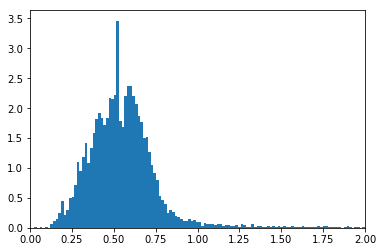

In [28]:
plt.hist(y_predict,1000,normed=True);
plt.xlim([0,2])

In [29]:
scipy.stats.pearsonr(y_realTT.reshape(-1), y_predict.reshape(-1))

(0.094025413594532495, 4.4154411888947578e-21)

(-1, 1)

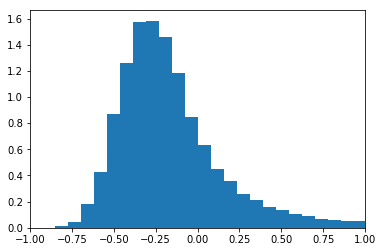

In [30]:
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-1, 1])

In [31]:
pickle.dump( errpd, open( "errpd"+str(fsize)+".pickle", "wb" ) )

In [32]:
errpd_5 = pickle.load( open( "errpd"+str(5)+".pickle", "rb" ) )
errpd_9 = pickle.load( open( "errpd"+str(9)+".pickle", "rb" ) )

In [33]:
model1_5 = np.loadtxt('pdf_errVdrift5X5X5')
model2_5 = np.loadtxt('pdf_errKbbMod5X5X5')
model1_9 = np.loadtxt('pdf_errVdrift9X9X9')
model2_9 = np.loadtxt('pdf_errKbbMod9X9X9')

(-1, 1)

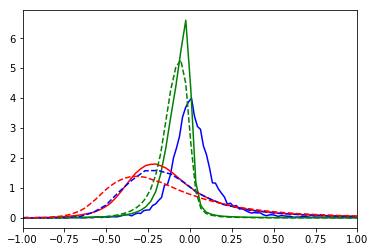

In [34]:
plt.plot(errpd_5[1][1:]+(errpd_5[1][1]-errpd_5[1][0])/2,errpd_5[0],'b')
plt.plot(model1_5[:,0], model1_5[:,1],'g')
plt.plot(model2_5[:,0], model2_5[:,1],'r')

plt.plot(errpd_9[1][1:]+(errpd_9[1][1]-errpd_9[1][0])/2,errpd_9[0],'--b')
plt.plot(model1_9[:,0], model1_9[:,1],'--g')
plt.plot(model2_9[:,0], model2_9[:,1],'--r')

plt.xlim([-1, 1])


In [35]:
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x)

NameError: name 'sns' is not defined

In [ ]:
sns.kdeplot(error_percent)

In [ ]:
ah[0].shape

In [ ]:
plt.scatter(ah[1],ah[0])

In [ ]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

# this create the kernel, given an array it will estimate the probability over that values
kde = gaussian_kde( error_percent )
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(error_percent), max(error_percent), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.xlim([-1,1])

In [ ]:
#Us_2 = np.array([[float(x[0].split()[0][1:]), float(x[0].split()[1]), float(x[0].split()[2][:-1])] for x in Us])

In [ ]:
#Us[-1]

In [ ]:
#Us_2[-1]